#Data Wrangling of NYC AirBnb Data
---
---

##Data Loading

In [2]:
from google.colab import files
upload=files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
#/content/AB_NYC_2019.csv
#/content/sb_utils.py

from sb_utils import save_file
#from sb_utils import save_file

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Info

In [5]:
nyc_data=pd.read_csv('/content/AB_NYC_2019.csv')
nyc_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
nyc_data.shape

(48895, 16)

In [7]:
nyc_data.info
#nyc_data.describe

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

In [8]:
nyc_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Null Values

In [9]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#len(nyc_data)
#len(nyc_data(['last_review'].count()))
#nyc_data['name'].isnull().count()
#nyc_data['last_review'].isnull().count()
nyc_missing_values = pd.concat([nyc_data.isnull().sum(), 100 * nyc_data.isnull().mean()], axis=1).sort_values(0, ascending=True)
nyc_missing_values

,0,1
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000


In [11]:
#len(nyc_missing_values['last_review'])
nyc_missing_values.columns=['count', '%']
nyc_missing_values

,count,%
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000


In [12]:
nyc_data['last_review'].isna().sum()

10052

##Percentage of missing reviews

In [13]:
#len(nyc_data['last_review'])

percentage_missing_reviews = (nyc_data['last_review'].isna().sum()) / len(nyc_data) * 100
percentage_missing_reviews

20.55833929849678

In [14]:
nyc_data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


##Find the Duplicates

In [15]:
nyc_data[nyc_data.duplicated(['id'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [16]:
nyc_data[nyc_data.duplicated(['host_id'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340
39,12048,LowerEastSide apt share shortterm 1,7549,Ben,Manhattan,Lower East Side,40.71401,-73.98917,Shared room,40,1,214,2019-07-05,1.81,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [17]:
nyc_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [18]:
#max_host_name = nyc_data['host_name'].max().head(1)
nyc_data['calculated_host_listings_count'].unique()
#max(str(nyc_data['host_name']))
#min(str(nyc_data['host_name']))

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

##Max Host Listings

In [19]:
max_number_host = max(nyc_data['calculated_host_listings_count'])
#max_number_host = max(nyc_data.calculated_host_listings_count)
#top_host = nyc_data[nyc_data['calculated_host_listings_count']] == max(nyc_data['calculated_host_listings_count']).head()
#top_host
top_host = nyc_data[nyc_data['calculated_host_listings_count']== max_number_host].head()
top_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81


In [20]:
nyc_data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

##Min, Max, Mean, Standard Deviation

In [21]:
from numpy import int64
#range(nyc_data['price']).value_counts()
nyc_data.describe(include=int64)

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [22]:
nyc_data.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0,38843.0,48895.0,48895.0
mean,19017143.0,67620011.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10983108.0,78610967.0,0.0,0.0,240.0,21.0,45.0,2.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9471945.0,7822033.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19677284.0,30793816.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29152178.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


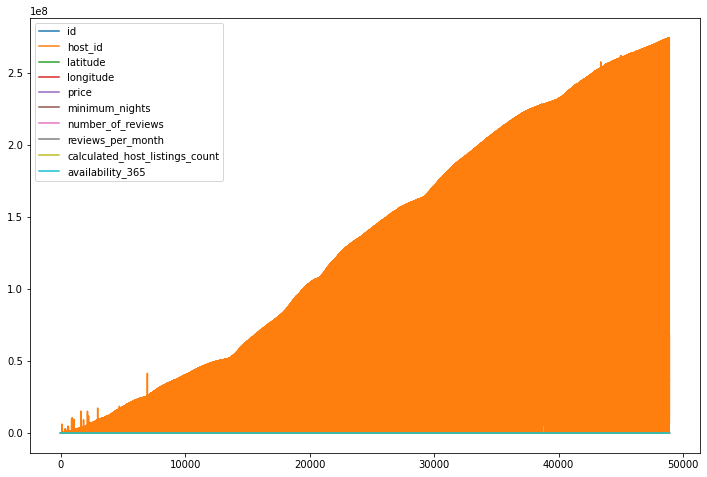

In [23]:
nyc_data.plot(figsize=(12,8), legend=True)

##Average Price Plot per Unit

Text(0.5, 0, 'Number of Units')

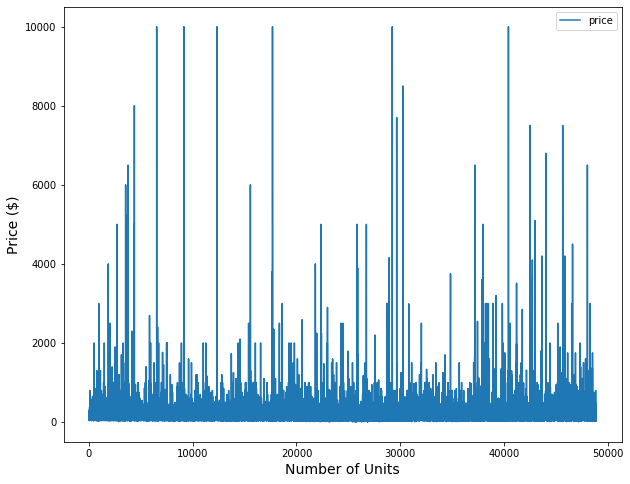

In [24]:
nyc_data.plot(y='price', figsize=(10,8))
plt.ylabel('Price ($)', size = 14)
plt.xlabel('Number of Units', size = 14)


In [25]:
average_price = nyc_data.groupby(['neighbourhood_group','room_type'])['price'].mean().round(2)
average_price

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.51
                     Private room        66.79
                     Shared room         59.80
Brooklyn             Entire home/apt    178.33
                     Private room        76.50
                     Shared room         50.53
Manhattan            Entire home/apt    249.24
                     Private room       116.78
                     Shared room         88.98
Queens               Entire home/apt    147.05
                     Private room        71.76
                     Shared room         69.02
Staten Island        Entire home/apt    173.85
                     Private room        62.29
                     Shared room         57.44
Name: price, dtype: float64

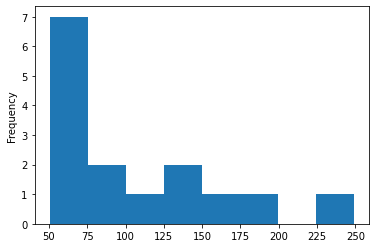

In [26]:
#average_price.plot.bar()
#average_price.plot.box()
average_price.plot.hist(bins=8)

##Number of Units per Neighbor Group

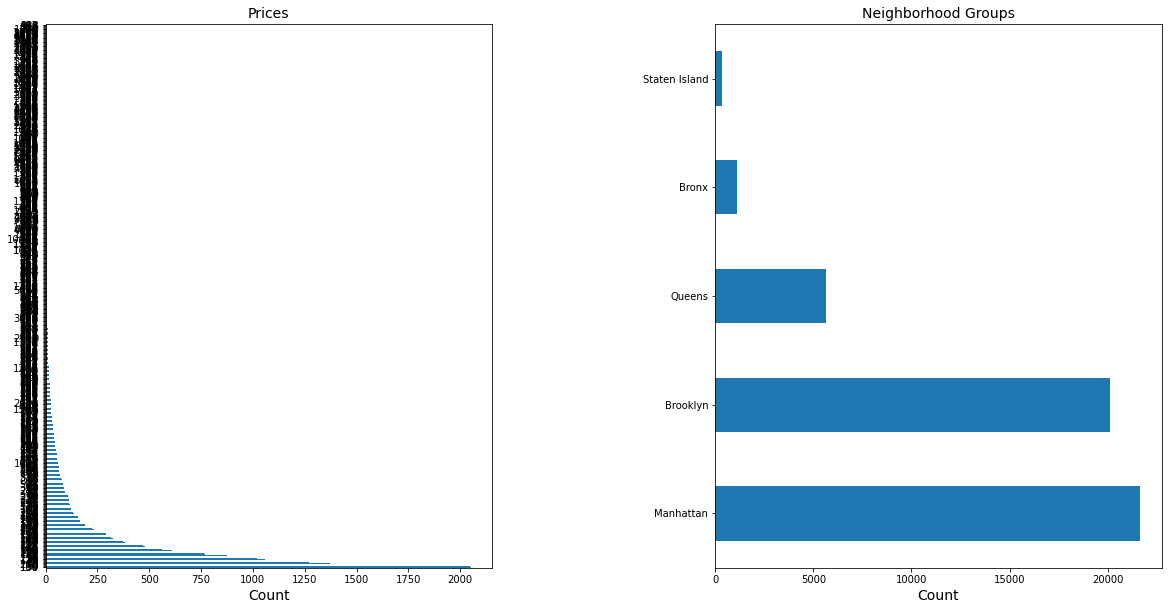

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
nyc_data['price'].value_counts().plot(kind='barh', ax=ax[0])
#nyc_data['price'].plot(kind='bar', ax=ax[0])
nyc_data['neighbourhood_group'].value_counts().plot(kind='barh', ax=ax[1])

ax[0].set_title('Prices', size = 14)
ax[0].set_xlabel('Count', size = 14)

ax[1].set_title('Neighborhood Groups', size = 14)
ax[1].set_xlabel('Count', size = 14)

plt.subplots_adjust(wspace=0.5)


##Average Prices in each Neighbor Groups

Text(0.5, 0, 'Neighborhood Group')

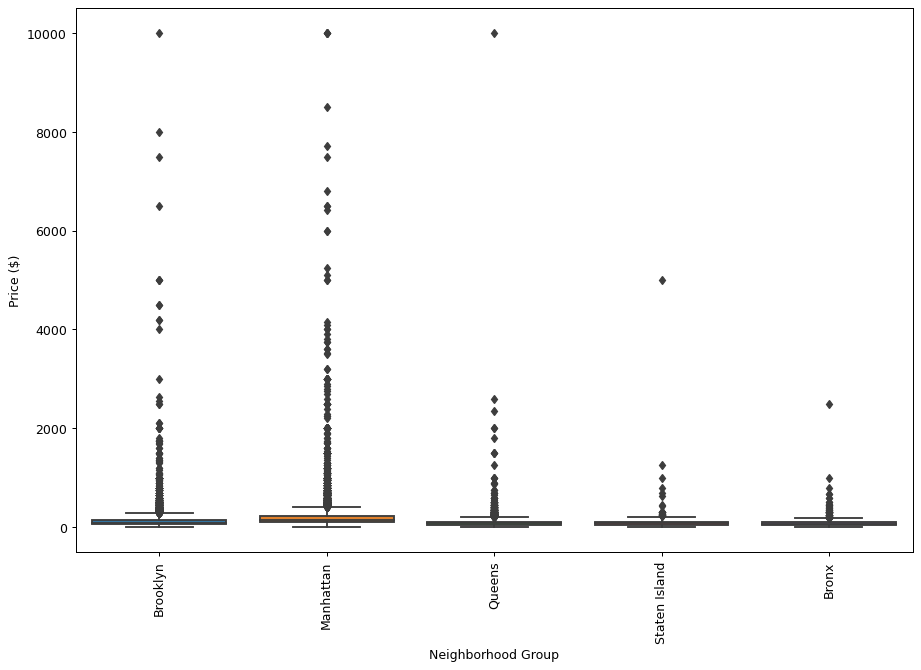

In [28]:
plt.subplots(figsize=(12, 8), dpi=90)
sns.boxplot(x=nyc_data['neighbourhood_group'], y=nyc_data['price'])
#sns.boxplot(x='neighborhood', y='price', data=nyc_data)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Neighborhood Group')

Text(0.5, 0, 'Neighborhood')

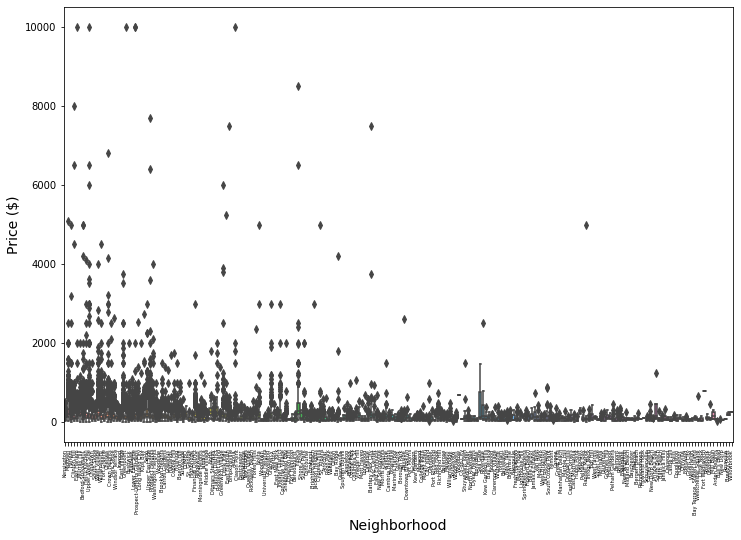

In [29]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x=nyc_data['neighbourhood'], y=nyc_data['price'])
#sns.boxplot(x='neighborhood', y='price', data=nyc_data)
plt.xticks(rotation='vertical', size = 5)
plt.ylabel('Price ($)', size=14)
plt.xlabel('Neighborhood', size=14)

Text(0.5, 0, 'Room Type')

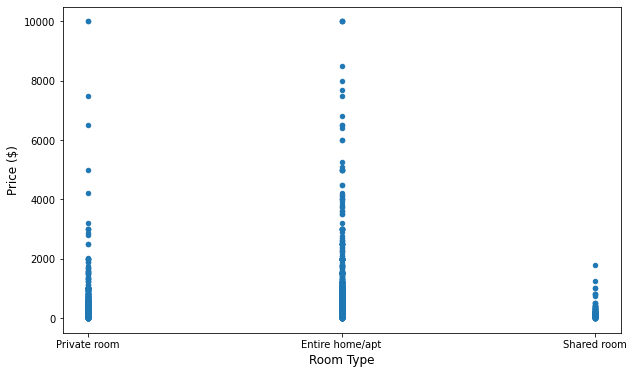

In [30]:
nyc_data.plot.scatter(x='room_type', y='price', figsize=(10,6))
plt.ylabel('Price ($)', size = 12)
plt.xlabel('Room Type', size = 12)

##Removing Null Values

In [ ]:
#Filling missing values in column ['reviews_per_month'] with an average value
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())
#Taking the rows in column ['name'], which are not NA
df_clean = df[df['name'].notna()]
df_clean.isnull().sum()

In [31]:
#Filling missing values in column ['reviews_per_month'], ['last_review'] with an average value
nyc_data['reviews_per_month'] = nyc_data['reviews_per_month'].fillna(nyc_data['reviews_per_month'].mean())
#nyc_data['last_review'] = nyc_data['last_review'].fillna(nyc_data['last_review'].mean())
#Taking the rows in column ['name'], which are not NA
df_clean = nyc_data[nyc_data['name'].notna()]
df_clean.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

##Replace Null Values with Zero

In [35]:
df_clean.fillna('0', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [36]:
df_clean.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
'''
#Filling missing values in column['last_review'] with an average value
#nyc_data['reviews_per_month'] = nyc_data['reviews_per_month'].fillna(nyc_data['reviews_per_month'].mean())
nyc_data['last_review'] = nyc_data['last_review'].fillna(nyc_data['last_review'].mean())
#Taking the rows in column ['name'], which are not NA
df_clean1 = nyc_data[nyc_data['host_name'].notna()]
df_clean1.isnull().sum()
'''

In [41]:
df_clean.describe().round()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0,48879.0
mean,19020615.0,67630125.0,41.0,-74.0,153.0,7.0,23.0,1.0,7.0,113.0
std,10982824.0,78620698.0,0.0,0.0,240.0,20.0,45.0,1.0,33.0,132.0
min,2539.0,2438.0,40.0,-74.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,9474248.0,7816856.0,41.0,-74.0,69.0,1.0,1.0,0.0,1.0,0.0
50%,19686426.0,30791331.0,41.0,-74.0,106.0,3.0,5.0,1.0,1.0,45.0
75%,29153339.0,107434423.0,41.0,-74.0,175.0,5.0,24.0,2.0,2.0,227.0
max,36487245.0,274321313.0,41.0,-74.0,10000.0,1250.0,629.0,58.0,327.0,365.0


In [ ]:
#/content/AB_NYC_2019.csv

##Save New File

In [42]:
# save the data to a new csv file
datapath = '../data'
save_file(nyc_data, 'nyc_data_cleaned.csv', datapath)

Directory ../data was created.
Writing file.  "../data/nyc_data_cleaned.csv"


In [ ]:
# save the state_summary separately.
#datapath = '../content'
#save_file(nyc_data, 'nyc_data_cleaned.csv', datapath)

Writing file.  "../content/nyc_data_cleaned.csv"
